# PRACTICA GUIADA: Visualización con Seaborn

## Reemplazo de valores, pivot_table y dummies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## 1. Introducción

En esta práctica vamos a trabajar sobre datos de nacicimientos en los Estados Unidos. Los datos provistos por el Center for Disease Control (CDC) pueden encontrarse [aquí](https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv). Más información sobre el análisis [aquí](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/).

In [2]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [3]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
year      15547 non-null int64
month     15547 non-null int64
day       15547 non-null object
gender    15547 non-null object
births    15547 non-null int64
dtypes: int64(3), object(2)
memory usage: 607.4+ KB


In [4]:
births.describe()

,year,month,births
count,15547.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,9762.293561
std,6.728340,3.449632,28552.465810
min,1969.000000,1.000000,1.000000
25%,1974.000000,4.000000,4358.000000
50%,1979.000000,7.000000,4814.000000
75%,1984.000000,10.000000,5289.500000
max,2008.000000,12.000000,199622.000000


In [5]:
births['day'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '99', 'null'], dtype=object)

* Notar que el último elemento del array ``` births['day'].unique()```, es un string, entonces la función ```isnull()```, devuelve ```False``` para ese elemento.
* Hagamos una primera limpieza de los valores incorrectos

In [6]:
births['day'].replace(['99','null'], np.nan, inplace=True)
births['day'] = births['day'].astype(float)
births['day'].unique()


array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  nan])

## 2. Algunas primeras visualizaciones con Seaborn

* Queremos obtener una visualización de la cantidad de nacimientos por año. Para ello, primero generamos una tabla (con `pivot_table`) con los datos agregados.

In [7]:
table = births.pivot_table(values = 'births', index='year', columns='gender', aggfunc='sum', margins=True)
table.head()

gender,F,M,All
year,,,
1969,1753634.0,1846572.0,3600206.0
1970,1819164.0,1918636.0,3737800.0
1971,1736774.0,1826774.0,3563548.0
1972,1592347.0,1673888.0,3266235.0
1973,1533102.0,1613023.0,3146125.0


* Tratamos los datos de entrada para el gráfico

In [8]:
años = table.index[:-1]
años

Index([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008],
      dtype='object', name='year')

In [9]:
nacimientos_años = table.iloc[:-1,-1].get_values()
nacimientos_años

array([ 3600206.,  3737800.,  3563548.,  3266235.,  3146125.,  3170631.,
        3153556.,  3176476.,  3332159.,  3338300.,  3499795.,  3617981.,
        3635515.,  3685457.,  3642821.,  3673568.,  3765064.,  3760695.,
        3813216.,  3913793.,  4045693.,  4162917.,  4115342.,  4069428.,
        4004523.,  3956925.,  3903012.,  3894874.,  3884329.,  3945192.,
        3963465.,  4063823.,  4031531.,  4027376.,  4096092.,  4118907.,
        4145619.,  4273225.,  4324008.,  4255156.])

* Comprobamos que la cantidad de datos para cada eje son las correctas.

In [10]:
len(años) == len(nacimientos_años)

True

* Construímos el gráfico.

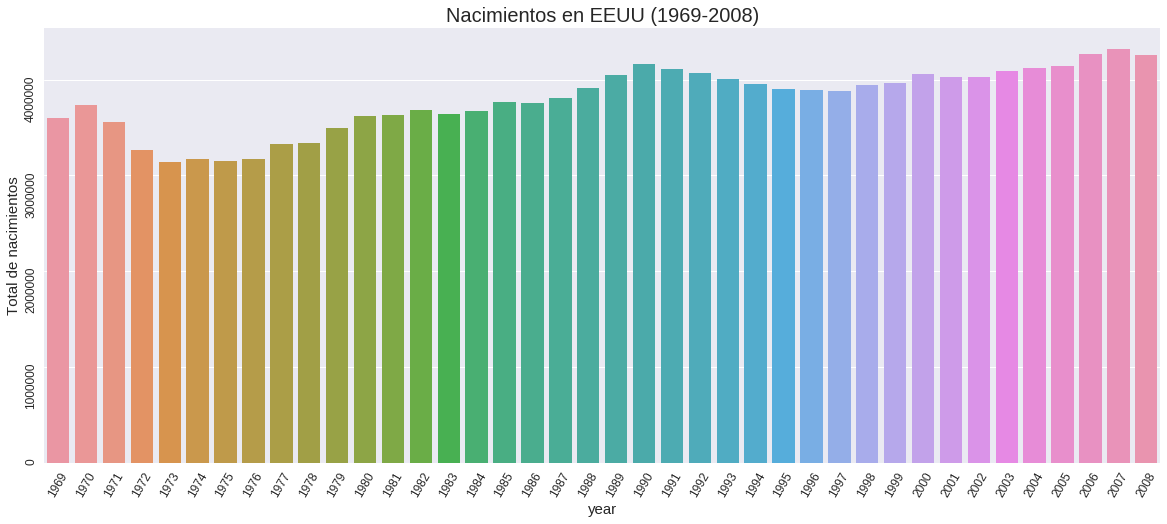

In [11]:
plt.figure(figsize=(20,8))

plt.title("Nacimientos en EEUU (1969-2008)", fontsize=20)

plt.xlabel('Year', fontsize=15)
plt.ylabel('Total de nacimientos', fontsize=15)

plt.xticks(fontsize=12, rotation=60)
plt.yticks(fontsize=12, rotation=90)

sns.barplot(x = años, y = nacimientos_años );

* Otra opción para generar el mismo gráfico...

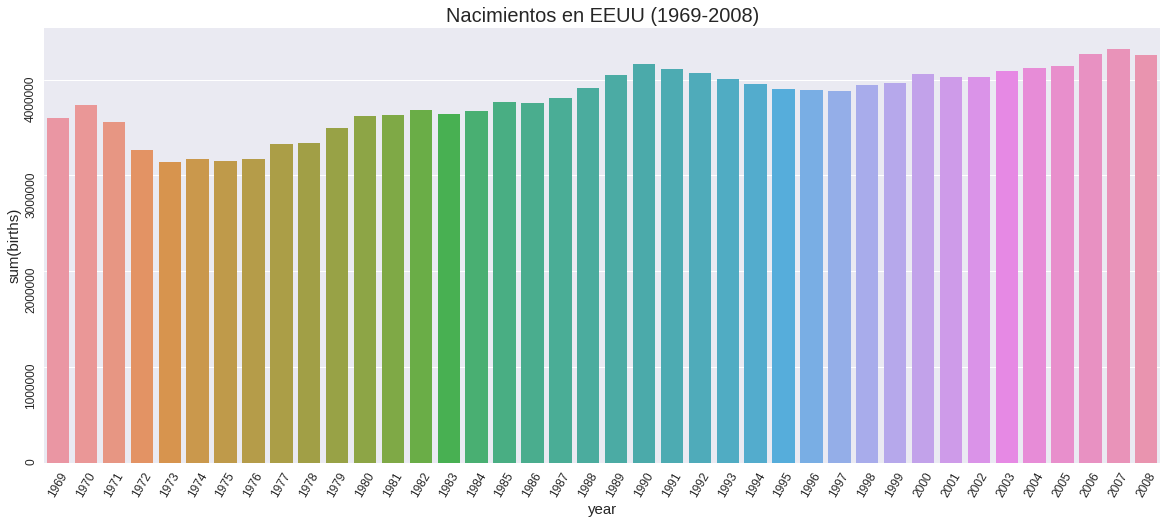

In [12]:
plt.figure(figsize=(20,8))

plt.title("Nacimientos en EEUU (1969-2008)", fontsize=20)

plt.xlabel('Year', fontsize=15)
plt.ylabel('Total de nacimientos', fontsize=15)

plt.xticks(fontsize=12, rotation=60)
plt.yticks(fontsize=12, rotation=90)

sns.barplot(x=births['year'], y=births['births'], estimator=np.sum, ci=None);

* Ahora, deseamos generar un gráfico del total de nacimientos por década...

In [13]:
births['decade'] = 10 * (births['year'] // 10)

table2 = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum', margins=True)
print(table2.head(3))

table2.columns = pd.Index(['F','M','All'])
table2.index = pd.Index(['1960','1970','1980','1990','2000','All'])

table2



gender           F           M         All
decade                                    
1960     1753634.0   1846572.0   3600206.0
1970    16263075.0  17121550.0  33384625.0
1980    18310351.0  19243452.0  37553803.0


,F,M,All
1960,1753634.0,1846572.0,3600206.0
1970,16263075.0,17121550.0,33384625.0
1980,18310351.0,19243452.0,37553803.0
1990,19479454.0,20420553.0,39900007.0
2000,18229309.0,19106428.0,37335737.0
All,74035823.0,77738555.0,151774378.0


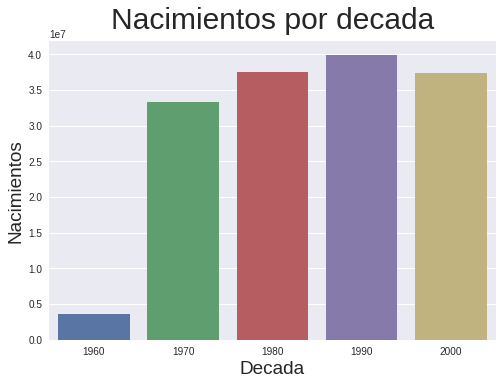

In [14]:
# Inicializamos el gráfico de barras con la información a graficar.
plot = sns.barplot( x = table2.index[0:5], y = table2['All'][0:5], ci=None)

# Agregamos el título.
plot.set_title('Nacimientos por decada', fontdict = {'fontsize': 30, 'verticalalignment':'bottom'})

# Ajustamos la leyenda de los ejes.
plot.set_xlabel('Decada', fontdict = {'fontsize':19})
plot.set_ylabel('Nacimientos', fontdict = {'fontsize':19});

### Ahora vamos a realizar un gráfico separando por género

In [15]:
table2['decade'] = table2.index

In [16]:
tabla3 = table2.melt(id_vars=['decade'])

tabla3 = tabla3.loc[ (tabla3['decade'] != 'All') & (tabla3['variable'] != 'All') ]

tabla3

,decade,variable,value
0,1960,F,1753634.0
1,1970,F,16263075.0
2,1980,F,18310351.0
3,1990,F,19479454.0
4,2000,F,18229309.0
6,1960,M,1846572.0
7,1970,M,17121550.0
8,1980,M,19243452.0
9,1990,M,20420553.0
10,2000,M,19106428.0


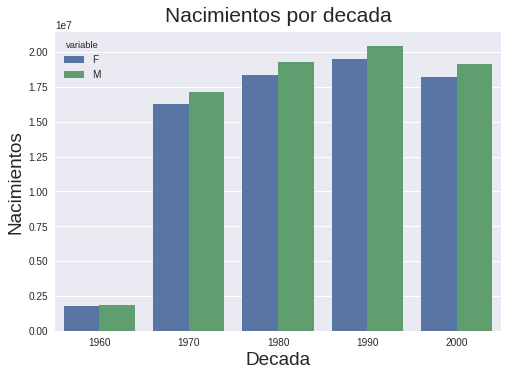

In [17]:
# Inicializamos el gráfico
plot = sns.barplot(x = 'decade', y = 'value', hue = 'variable',  data = tabla3, ci=None);

# Agregamos el título.
plot.set_title('Nacimientos por decada', fontdict = {'fontsize': 21, 'verticalalignment':'bottom'} )

# Ajustamos la leyenda de los ejes.
plot.set_xlabel('Decada',      fontdict = {'fontsize':19})
plot.set_ylabel('Nacimientos', fontdict = {'fontsize':19})

plt.show()

## 5. Algunas formas de visualizar series de tiempo

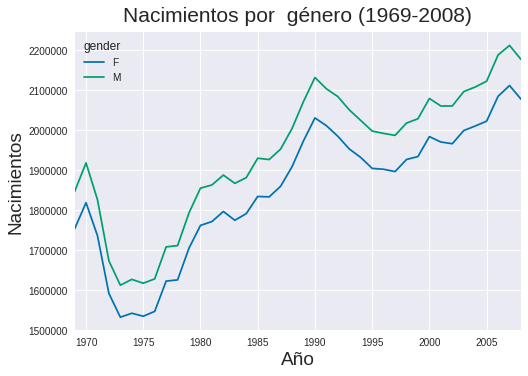

In [18]:
# Tomo estilos de Seaborn
sns.set(style="darkgrid", palette="colorblind", color_codes=True)  

plot = births.pivot_table('births', index='year', 
                   columns='gender', aggfunc='sum').plot()

# Agregamos el título.
plot.set_title('Nacimientos por  género (1969-2008)', fontdict = {'fontsize': 21, 'verticalalignment':'bottom'} )

# Ajustamos la leyenda de los ejes.
plot.set_xlabel('Año',      fontdict = {'fontsize':19})
plot.set_ylabel('Nacimientos', fontdict = {'fontsize':19});

* Ploteemos ahora la proporción de hombres

In [19]:
table['M/F'] = round(table['M'] / table['F'], 2)
table['%M'] = round(table['M'] / table['All'] * 100, 1)
table.head()

gender,F,M,All,M/F,%M
year,,,,,
1969,1753634.0,1846572.0,3600206.0,1.05,51.3
1970,1819164.0,1918636.0,3737800.0,1.05,51.3
1971,1736774.0,1826774.0,3563548.0,1.05,51.3
1972,1592347.0,1673888.0,3266235.0,1.05,51.2
1973,1533102.0,1613023.0,3146125.0,1.05,51.3


In [20]:
# sns.tsplot?

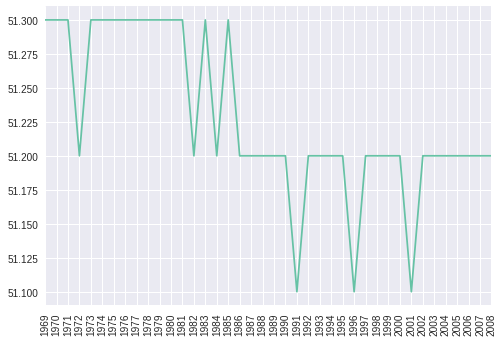

In [21]:
sns.set(style="darkgrid", palette="Set2")

# Genero el eje x con 40 posiciones (2008-1969) para poner como etiqueta cada uno de los años.

plt.xticks([x for x in range(40)], table.index[:-1], rotation=90)

# Hago el gráfico

sns.tsplot(data=table['%M'][:-1], legend=False);

* Otra forma... pasamos el índice de la tabla como el argumento `time=`

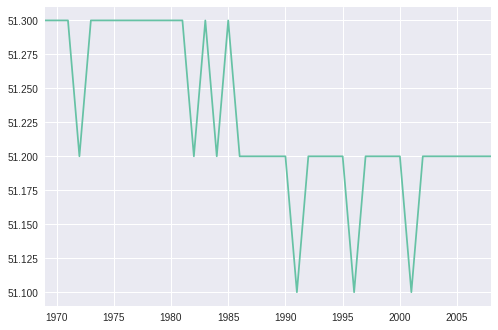

In [22]:
sns.tsplot(data=table['%M'][:-1], time=table.index[0:-1].get_values(), legend=False);

## 3. Usando Dummies y filtros

* Generemos ahora un `DataFrame` que contenga el `gender` como dummy: 

In [23]:
births = births.join(pd.get_dummies(births['gender'], prefix='gender', prefix_sep='_', drop_first=True))
births.head()

,year,month,day,gender,births,decade,gender_M
0,1969,1,1.0,F,4046,1960,0
1,1969,1,1.0,M,4440,1960,1
2,1969,1,2.0,F,4454,1960,0
3,1969,1,2.0,M,4548,1960,1
4,1969,1,3.0,F,4548,1960,0


* Eliminamos la columna `gender`

In [24]:
del births['gender']
births.head()

,year,month,day,births,decade,gender_M
0,1969,1,1.0,4046,1960,0
1,1969,1,1.0,4440,1960,1
2,1969,1,2.0,4454,1960,0
3,1969,1,2.0,4548,1960,1
4,1969,1,3.0,4548,1960,0


* Tanto hombres como mujeres figuran una vez para cada día, por lo tanto la mitad de los registros son de hombres y la otra mitad de mujeres. 
* La media para todos los días debe figurar en 0.5 cuando ambos géneros vienen informados

In [25]:
probabilidades = births.groupby(['day','month'])['gender_M'].aggregate('mean').unstack()
probabilidades

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1.0,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.5,0.500000,0.5,0.500000,0.5
2.0,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.5,0.500000,0.5,0.500000,0.5
3.0,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.5,0.500000,0.5,0.500000,0.5
4.0,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.5,0.500000,0.5,0.500000,0.5
5.0,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.5,0.500000,0.5,0.500000,0.5
6.0,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.5,0.500000,0.5,0.500000,0.5
7.0,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.5,0.500000,0.5,0.500000,0.5
8.0,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.5,0.500000,0.5,0.500000,0.5
9.0,0.5,0.500000,0.5,0.500000,0.5,0.5,0.5,0.5,0.500000,0.5,0.500000,0.5


* Vemos que no todos los meses es así.
* Observemos el mes de Abril.

In [26]:
births[births['month'] == 4]

,year,month,day,births,decade,gender_M
192,1969,4,1.0,4990,1960,0
193,1969,4,1.0,4970,1960,1
194,1969,4,2.0,4766,1960,0
195,1969,4,2.0,5212,1960,1
196,1969,4,3.0,4682,1960,0
197,1969,4,3.0,4848,1960,1
198,1969,4,4.0,4718,1960,0
199,1969,4,4.0,4854,1960,1
200,1969,4,5.0,4384,1960,0
201,1969,4,5.0,4364,1960,1


*  Los datos erróneos nos generan algunos días donde la proporción no es 50%

In [27]:
probabilidades[(probabilidades>0.5).any(1)]

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
31.0,0.5,0.5,0.5,0.470588,0.5,0.5,0.5,0.5,0.526316,0.5,0.526316,0.5


In [28]:
probabilidades[(probabilidades<0.5).any(1)]

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
29.0,0.5,0.458333,0.5,0.500000,0.5,0.5,0.5,0.5,0.500000,0.5,0.500000,0.5
30.0,0.5,0.400000,0.5,0.500000,0.5,0.5,0.5,0.5,0.500000,0.5,0.500000,0.5
31.0,0.5,0.500000,0.5,0.470588,0.5,0.5,0.5,0.5,0.526316,0.5,0.526316,0.5


## 6. Nacimientos por día

* Ahora vamos a estudiar la cantidad de nacimientos por día para distintos meses del año.

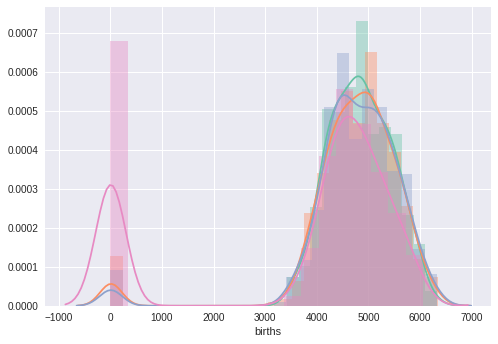

In [29]:
for i in range(28,32):
    sns.distplot(births['births'][(births['day']==i)]);

* El día 28 muestra una distribución normal a lo largo de los meses

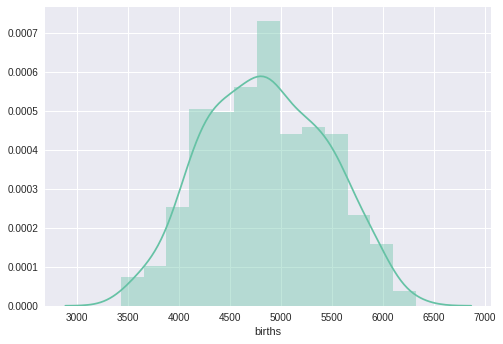

In [30]:
sns.distplot(births['births'][(births['day']==28)]);

* El día 29, en adelante muestra 0 para los meses que no figuran 
* Los datos erróneos distorsionan las distribuciones el resto de los días

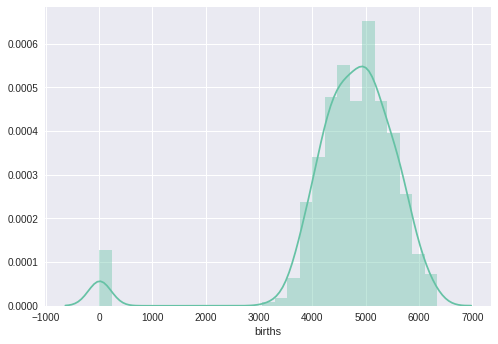

In [31]:
sns.distplot(births['births'][(births['day']==29)]);

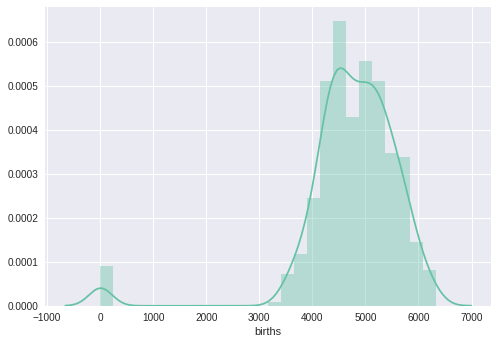

In [32]:
sns.distplot(births['births'][(births['day']==30)]);

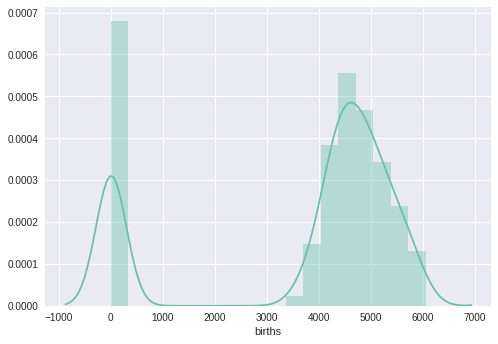

In [33]:
sns.distplot(births['births'][(births['day']==31)]);

* ¿Eliminarías algún registro? ¿Por qué?
* Encontramos que algunos datos estaban mal cargados en el dataset original

In [34]:
births[births['month'] == 2].head(60)

,year,month,day,births,decade,gender_M
64,1969,2,1.0,4394,1960,0
65,1969,2,1.0,4736,1960,1
66,1969,2,2.0,4334,1960,0
67,1969,2,2.0,4480,1960,1
68,1969,2,3.0,4878,1960,0
69,1969,2,3.0,5110,1960,1
70,1969,2,4.0,4796,1960,0
71,1969,2,4.0,5200,1960,1
72,1969,2,5.0,4674,1960,0
73,1969,2,5.0,5002,1960,1
